# Inverse Fast Fourier Transform(ifft)/ Discrete Inverse Fourier Transform
<h2>Kianoush Arshi<br>
810198438</h2>

## Table of Contents
* [Part A](#Part-A)
* [Part B](#Part-B)
* [Part C](#Part-C)
    * [Part 1](#Part-C1)
    * [Part 2](#Part-C2)    
* [Part D](#Part-D)
* [Part E](#Part-E)


In [1]:
import numpy as np
import pandas as pd
from numpy import pi as PI
import matplotlib.pyplot as plt
from time import time
from scipy.fft import fft, fftfreq, ifft

In [2]:
signal = []
with open('Signal.txt') as f:
    signal = [float(s) for s in f.readlines()]

In [3]:
def plot_transform(_range, _transform, title="Amplitude-Frequency", xlabel="Frequency", ylabel="Amplitude"):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot()

    ax.plot(_range, _transform)
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)

    plt.show()

# Part A


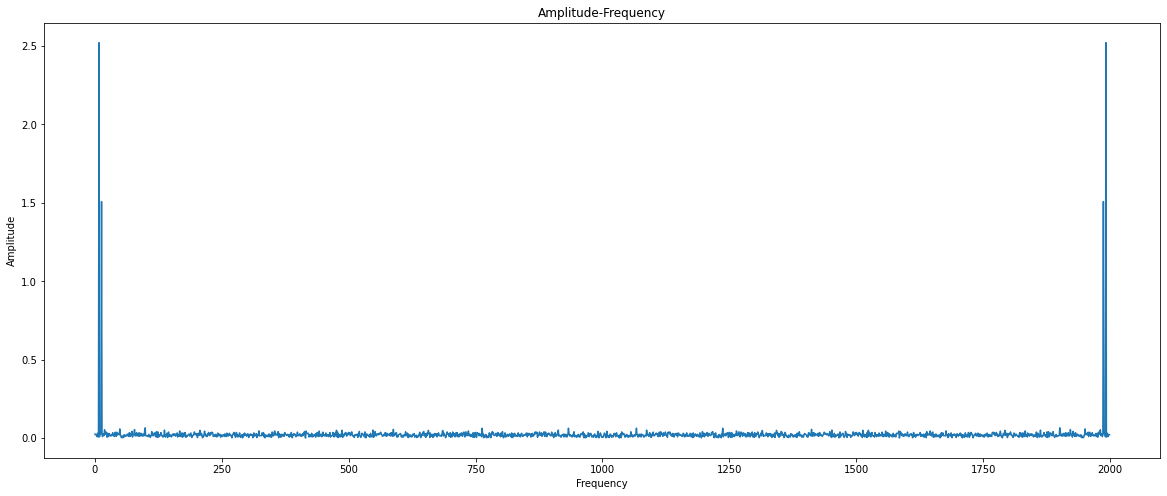

In [4]:
sample_rate = len(signal)/2
freq_range = np.arange(0, 2*sample_rate, 1)
time_freq = np.arange(0, 1, 1/(2*sample_rate))

transform = [(2*sum((np.exp(-2 * PI * 1.j * freq * time_freq))*signal)/(2*sample_rate)) for freq in freq_range]

plot_transform(freq_range, np.abs(transform))

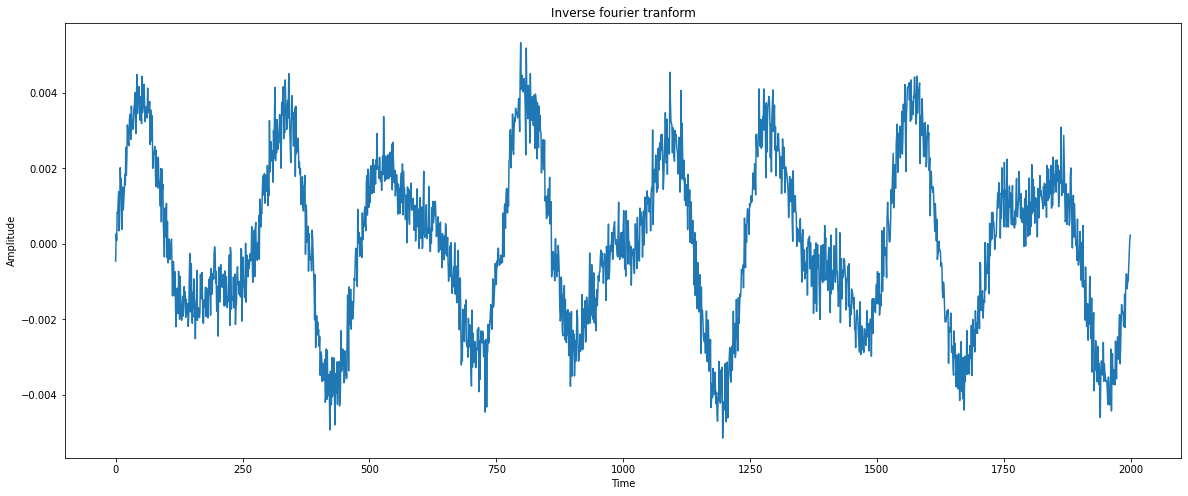

In [5]:
import warnings
warnings.filterwarnings('ignore')

time_freq = np.arange(0, 1, 1/(2*sample_rate))
_signal = [sum(transform*np.exp(2 * PI * 1.j * freq * time_freq)/(2*sample_rate)) for freq in freq_range]

plot_transform(freq_range, _signal, title="Inverse fourier tranform", xlabel="Time")

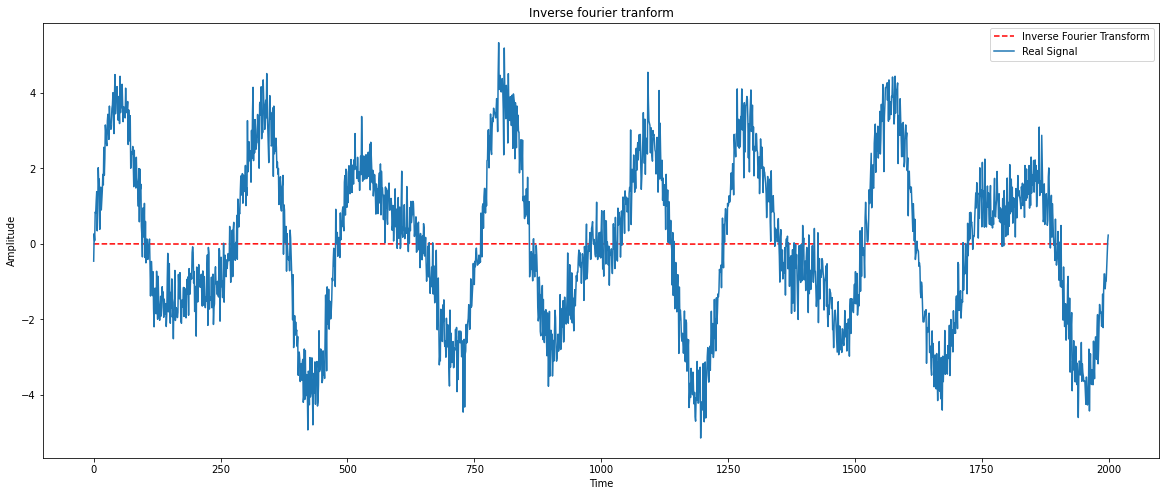

In [6]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(freq_range, _signal, '--r', label="Inverse Fourier Transform")
ax.plot(freq_range, signal, label="Real Signal")
ax.set_title("Inverse fourier tranform")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
plt.legend(loc="best")
plt.show()

The plots are not identical. This is because we have previously normallized our coefficients so we'll need to revert back to the unnormalized coefficients. Another reason is because we applied the second correction factor(*1000). We need to apply this only when we are calculating the Fourier Transform, for the inverse transform we'll need to invert the multiplication.

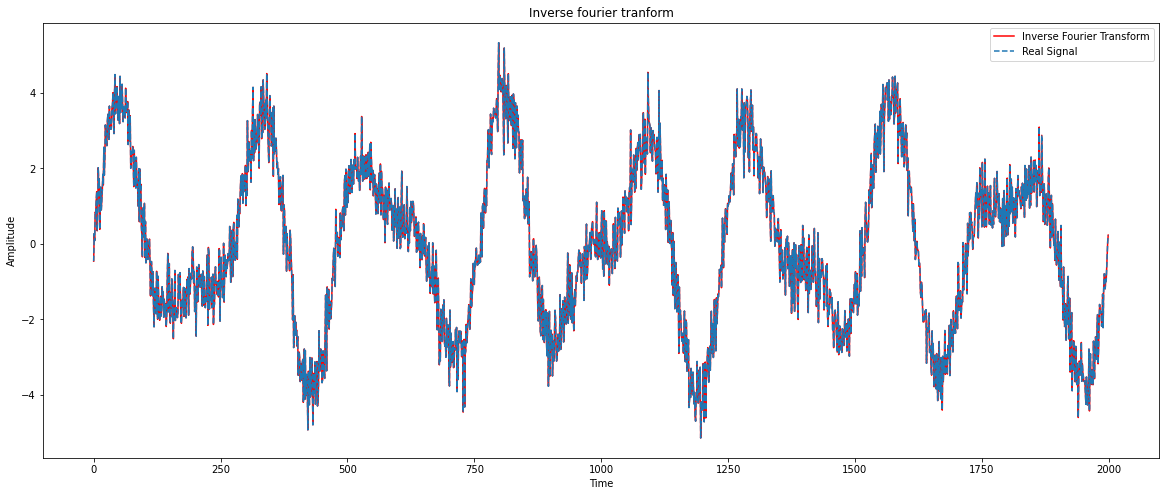

In [7]:
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(freq_range, (pd.Series(_signal)*1000).to_list(), 'r', label="Inverse Fourier Transform")
ax.plot(freq_range, signal, '--', label="Real Signal")
ax.set_title("Inverse fourier tranform")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
plt.legend(loc="best")
plt.show()

# Part B

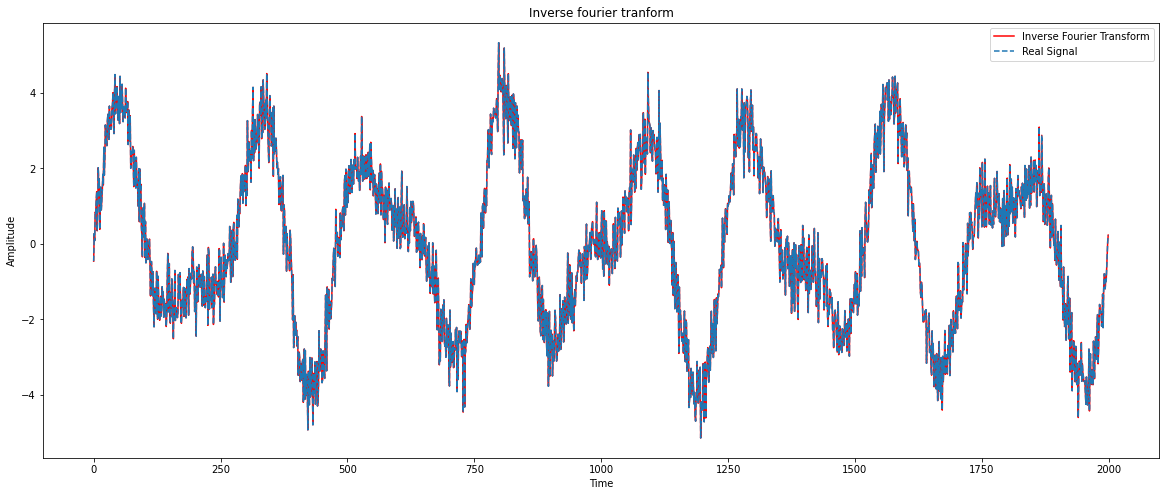

In [8]:
_transform = fft(signal)
i_transform = ifft(_transform)

fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot()
ax.plot(freq_range, i_transform, 'r', label="Inverse Fourier Transform")
ax.plot(freq_range, signal, '--', label="Real Signal")
ax.set_title("Inverse fourier tranform")
ax.set_xlabel("Time")
ax.set_ylabel("Amplitude")
plt.legend(loc="best")
plt.show()

As you can see, the plots are identical.

# Part C

# Part C1

In [9]:
SAMPLE_RATE = 1000
START_TIME = 0
END_TIME = 3
nyquist = 0.5

In [10]:
time_range = np.arange(START_TIME,END_TIME,1/SAMPLE_RATE)
time = len(time_range)

k_t  = np.multiply( (1+np.sin(2*PI*12*time_range)) , np.cos(np.sin(2*PI*25*time_range)+time_range) )

In [11]:
fourier_time = np.array(range(0,time))/time
fourier_coefs = [np.sum( np.multiply(k_t,np.exp( -1j*2*PI*ti*fourier_time )) ) / time for ti in range(time)]

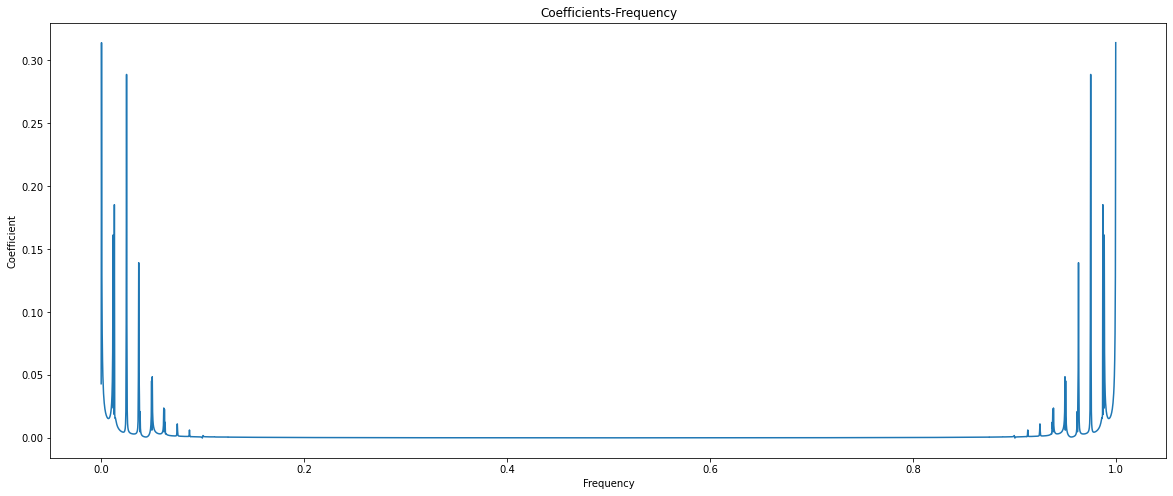

In [12]:
plot_transform(fourier_time, np.abs(fourier_coefs), title="Coefficients-Frequency", xlabel="Frequency", ylabel="Coefficient")

# Part C2

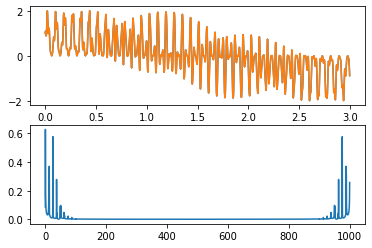

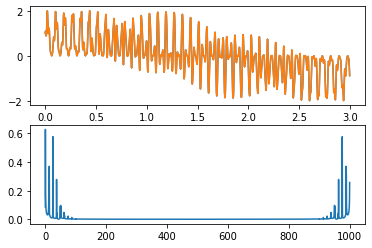

In [13]:
import time as tme
from IPython import display


freq_range = np.linspace(0, SAMPLE_RATE, time)

recovered_k_t = np.zeros(len(k_t), dtype=complex)

for ti in range(time):
    recovered_k_t += fourier_coefs[ti] * np.exp( 1j*2*PI*ti*fourier_time )
    
    if ti<300 or ti>2700:
        plt.cla()
        plt.subplot2grid((2,1),(0,0))
        plt.plot(time_range,k_t,label='Original')
        plt.plot(time_range,np.real(recovered_k_t),label='Reconstruction')
        
        
        plt.subplot2grid((2,1),(1,0))
        plt.plot(freq_range[0:ti],2*np.abs(fourier_coefs[0:ti]))
#         plt.legend(loc="best")
        display.clear_output(wait=True)
        display.display(plt.gcf())


As you can see above, the reconstructed signal slowly starts to get closer to the real signal. This is happening because in each iteration, we add the reconstructed signal with a new coefficient-modulated complex sine wave based on the fourier coefficients. So obviously in the high valued coefficients we have the most drastic changes.

# Part D

In [15]:
h_t = np.sin(2*PI*4.5*time_range) + np.cos(2*PI*3*time_range)
alpha = np.linspace(0, 10, 3)

# Part E